In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import folium
from folium import plugins

import random
import plotly.graph_objects as go
import plotly.express as px
from folium.plugins import HeatMap, MarkerCluster
from folium import Choropleth, Circle, Marker

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/earthquake/earthquake.csv')

In [4]:
df = df.fillna('N')

In [5]:
df["date"] = pd.to_datetime(df["time"])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["hour"] = df["date"].dt.hour

# Phân tích năm 2011

### Cường độ các cơn động đất trong năm 2011

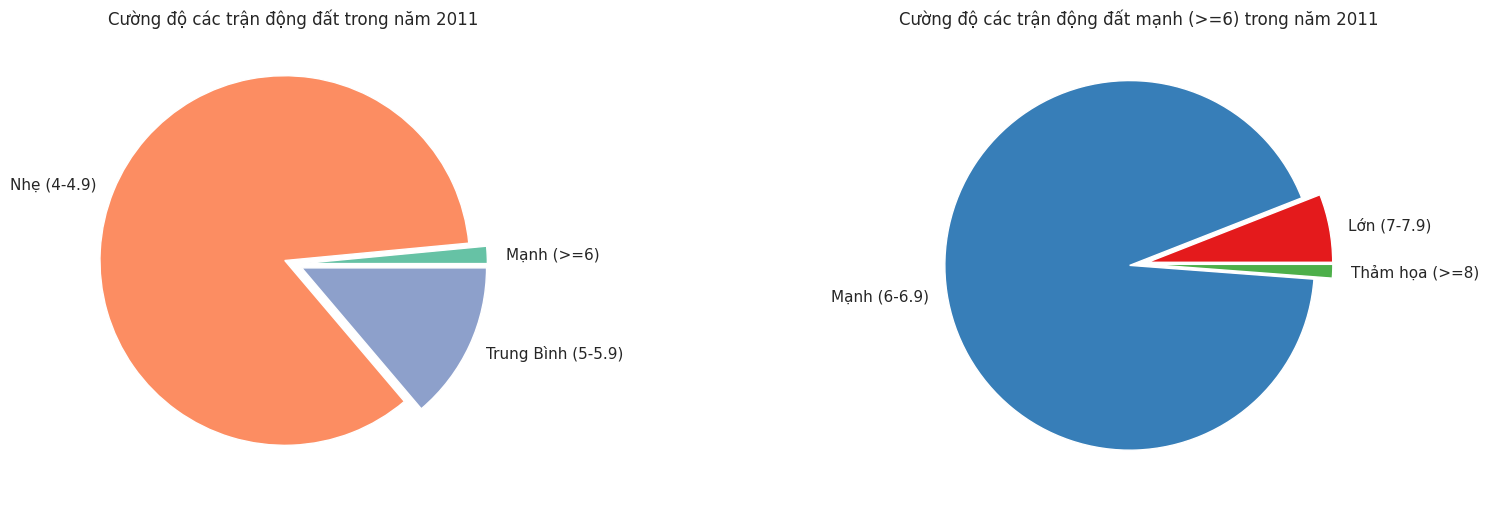

In [6]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
df_2011_light = pd.DataFrame(data=df.query("year == 2011"))
df_2011_light.loc[(df_2011_light.mag >= 4) & (df_2011_light.mag < 5), 'mag_key'] = 'Nhẹ (4-4.9)'
df_2011_light.loc[(df_2011_light.mag >= 5) & (df_2011_light.mag < 6), 'mag_key'] = 'Trung Bình (5-5.9)'
df_2011_light.loc[(df_2011_light.mag >= 6), 'mag_key'] = 'Mạnh (>=6)'

df_mag_light_2011 = pd.DataFrame(data=df_2011_light.groupby('mag_key').place.count()).reset_index()
total = np.sum(df_mag_light_2011["place"])

keys_light = df_mag_light_2011['mag_key']
percentage_light = df_mag_light_2011['place'] * 100 / total
patches, texts = plt.pie(percentage_light, labels=keys_light, colors=sns.color_palette('Set2'), explode=[0.05, 0.05, 0.05])
plt.title("Cường độ các trận động đất trong năm 2011")

plt.subplot(1, 2, 2)
df_2011_strong = pd.DataFrame(data=df.query("year == 2011"))
df_2011_strong.loc[(df_2011_strong.mag >= 6) & (df_2011_strong.mag < 7), 'mag_key'] = 'Mạnh (6-6.9)'
df_2011_strong.loc[(df_2011_strong.mag >= 7) & (df_2011_strong.mag < 8), 'mag_key'] = 'Lớn (7-7.9)'
df_2011_strong.loc[(df_2011_strong.mag >= 8), 'mag_key'] = 'Thảm họa (>=8)'

df_mag_strong_2011 = pd.DataFrame(data=df_2011_strong.groupby('mag_key').place.count()).reset_index()
total = np.sum(df_mag_strong_2011["place"])

keys_strong = df_mag_strong_2011['mag_key']
percentage_strong = df_mag_strong_2011['place'] * 100 / total

patches, texts = plt.pie(percentage_strong, labels=keys_strong, colors=sns.color_palette('Set1'), explode=[0.05, 0.05, 0.05])
plt.title("Cường độ các trận động đất mạnh (>=6) trong năm 2011")
plt.show()

In [7]:
df_2011 = pd.DataFrame(data=df.query("year==2011")).reset_index()
geo_stat_list_final = pd.DataFrame({'lat': df_2011["latitude"],'lon': df_2011["longitude"],'magnitude': df_2011['mag']})

map = folium.Map(location=[37, 138],tiles='Stamen Terrain', zoom_start=5)

mc = MarkerCluster()
for idx, row in geo_stat_list_final.iterrows():
    mc.add_child(Marker([row['lat'], row['lon']]))

map.add_child(mc)
map

### Số lượng các trận động đất theo tháng của năm 2011

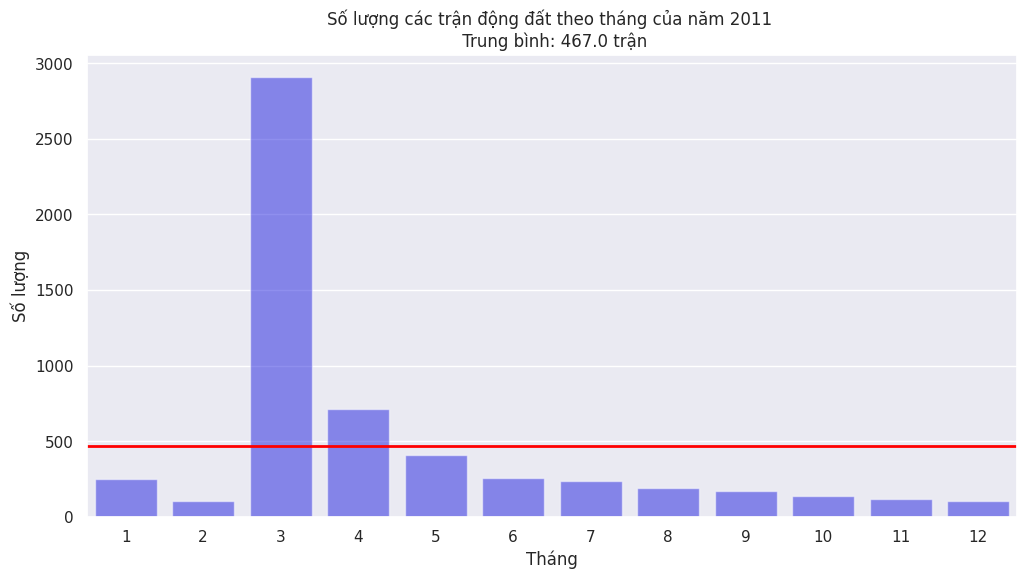

In [22]:
df_2011_month_count = pd.DataFrame(data=df.query("year==2011").groupby("month").place.count()).reset_index()
mean = np.mean(df_2011_month_count["place"])


plt.figure(figsize=(12, 6))
sns.barplot(x=df_2011_month_count["month"], y=df_2011_month_count["place"], color="blue", alpha=0.5)
plt.hlines(y=mean, xmin=-1, xmax=24, color="red", linewidth=2)
plt.xlim([-0.5, 11.5])
plt.xlabel("Tháng")
plt.ylabel('Số lượng')
plt.title("Số lượng các trận động đất theo tháng của năm 2011 \n Trung bình: {} trận".format(mean.round(0)))
plt.show()

### Số lượng các trận động đất theo ngày của năm 2011

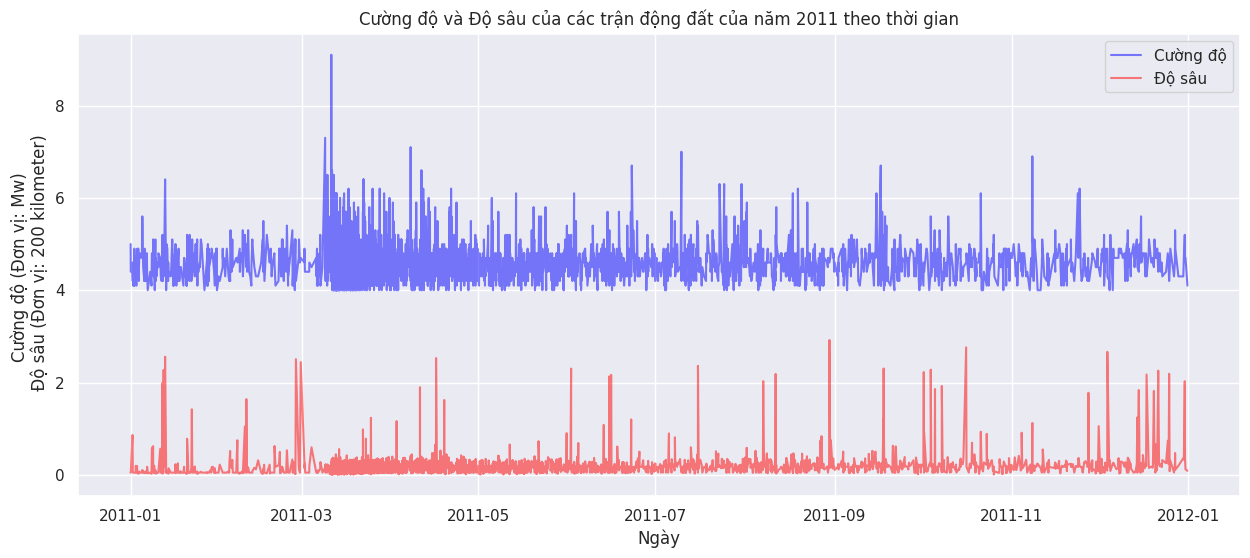

In [23]:
df_2011_day_count = pd.DataFrame(data=df.query("year==2011")).reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x=df_2011_day_count["date"], y=df_2011_day_count["mag"], color="blue", alpha=0.5, label="Cường độ")
sns.lineplot(x=df_2011_day_count["date"], y=df_2011_day_count["depth"] / 200, color="red", alpha=0.5, label="Độ sâu")

plt.xlabel("Ngày")
plt.ylabel('Cường độ (Đơn vị: Mw) \n Độ sâu (Đơn vị: 200 kilometer)')
plt.legend()
plt.title("Cường độ và Độ sâu của các trận động đất của năm 2011 theo thời gian")
plt.show()

Tháng 3 năm 2011, Nhật Bản chứng kiến số trận động đất lên đến gần 3000. Trong số những trận động đất có 1 cơn động đất và lớn nhất từ trước đến nay lên đến 9.1 Ritcher mang tên động đất Tōhoku.

# Thảm họa động đất và sóng thần Tōhoku



### Vị trí các cơn động đất Tohoku

In [10]:
map = folium.Map(location=[37, 138],tiles='Stamen Terrain', zoom_start=5)

tohoku = pd.DataFrame({
    'place':df.query("year==2011 and month==3 and mag==9.1")["place"].values,
    'mag':df.query("year==2011 and month==3 and mag==9.1")["mag"].values,
    'lat':df.query("year==2011 and month==3 and mag==9.1")["latitude"].values,
    'lon':df.query("year==2011 and month==3 and mag==9.1")["longitude"].values
})

for i, r in tohoku.iterrows():
    folium.CircleMarker(location=[r["lat"],r["lon"]], radius=r["mag"], popup=r["place"], color='red').add_to(map)

map.add_child(plugins.HeatMap(tohoku[["lat", "lon"]]))  
map

### Có dấu hiệu gì của cơn động đất 9.1 Mw này không

In [13]:
df_2011_3_11_before = pd.DataFrame(data=df.query("year==2011 and month == 3 and day >= 9 and day <= 11")).reset_index()

fig = px.scatter(x=df_2011_3_11_before['date'],y=df_2011_3_11_before['mag'], labels={
                     "x": "Ngày",
                     "y": "Cường độ (Đơn vị:Ritcher)",
                 },
                title="Các trận động đất trước ngày 11 tháng 3 năm 2011")

fig.show()

Trước ngày 11/3, cụ thể là vào ngày 9/3 và 10/3 đã xảy ra 1 số trận động đất nằm trong khoảng từ 4-7 Mw. Ngoài ra, vị trí xảy ra của các động đất này cũng gần với trận động đất 9.1 Mw

In [14]:
df_2011_3_11_before = pd.DataFrame(data=df.query("(year==2011 and month == 3 and day <11 and day >=9) or mag == 9.1")).reset_index()
geo_stat_list_final = pd.DataFrame({'lat': df_2011_3_11_before["latitude"],'lon': df_2011_3_11_before["longitude"],'magnitude': df_2011_3_11_before['mag']})

fig = px.scatter_mapbox(geo_stat_list_final, lat=geo_stat_list_final.lat, 
                        lon=geo_stat_list_final.lon,
                        color=geo_stat_list_final.magnitude,
                        size=geo_stat_list_final.magnitude,
                        color_continuous_scale=[[0.0, 'blue',],[0.3,'lime'],[0.5,'yellow'],[0.7,'orange'],[1.0, 'red']],# custome colorscale
                        range_color=[0, 10],
                        )

fig.update_layout(mapbox_style="stamen-terrain",
                  mapbox_center_lon=142,
                  mapbox_center_lat=38,
                  mapbox_zoom=6)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Các cơn động đất trong ngày 11/3/2011 sau trận động đất chính

In [24]:
df_2011_3_11 = pd.DataFrame(data=df.query("year==2011 and month == 3 and day == 11")).reset_index()
geo_stat_list_final = pd.DataFrame({'lat': df_2011_3_11["latitude"],'lon': df_2011_3_11["longitude"],'magnitude': df_2011_3_11['mag'], 'date': df_2011_3_11['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:00:00'))})
geo_stat_list_final = geo_stat_list_final.sort_values('date')

fig = px.scatter_mapbox(geo_stat_list_final, lat=geo_stat_list_final.lat, 
                        lon=geo_stat_list_final.lon,
                        color=geo_stat_list_final.magnitude,
                        size=geo_stat_list_final.magnitude * 10,
                        color_continuous_scale=[[0.0, 'blue',],[0.3,'lime'],[0.5,'yellow'],[0.7,'orange'],[1.0, 'red']],# custome colorscale
                        range_color=[0, 10],
                        animation_frame="date"
                        )

fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=5, mapbox_center = {"lat": 37, "lon": 138},)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 600
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 600
fig.layout.coloraxis.showscale = True   
fig.layout.sliders[0].pad.t = 10
fig.layout.updatemenus[0].pad.t= 10

fig.show()

### Các cơn dư chấn sau thảm họa Tohoku

In [15]:
df_2011_3_11_after = pd.DataFrame(data=df.query("((year == 2011 and month == 3 and day > 11) or (year > 2011)) and mag > 6")).reset_index()

fig = px.scatter(x=df_2011_3_11_after['date'],y=df_2011_3_11_after['mag'], labels={
                     "x": "Ngày",
                     "y": "Cường độ (Đơn vị:Ritcher)",
                 },
                title="Các cơn dư chấn (>6 Mw) sau ngày 11 tháng 3 năm 2011")

fig.show()

### Các cơn sóng thần trong sự kiện 11/3/2011

In [16]:
tsu = pd.read_csv('/kaggle/input/earthquake/tsunami-damage.csv')
tsu = tsu.dropna(subset='Max Water Height (m)')
tsu['height'] = tsu['Max Water Height (m)']

In [18]:
tsu_2011_3_11 = pd.DataFrame(data=tsu.query("Year == 2011 and Mo == 3 and Dy == 11")).reset_index()

geo_stat_list_final = pd.DataFrame({'lat': tsu_2011_3_11["Latitude"],'lon': tsu_2011_3_11["Longitude"],'height': tsu_2011_3_11['Max Water Height (m)']})
geo_stat_list_final = geo_stat_list_final.sort_values('height')
fig = px.scatter_mapbox(geo_stat_list_final, lat=geo_stat_list_final.lat, 
                        lon=geo_stat_list_final.lon,
                        color=geo_stat_list_final.height,
                        size=geo_stat_list_final.height,
                        color_continuous_scale=[[0.0, 'blue',],[0.3,'lime'],[0.5,'yellow'],[0.7,'orange'],[1.0, 'red']],# custome colorscale
                        range_color=[0, 45],
                        )

fig.update_layout(mapbox_style="stamen-terrain",
                  mapbox_center_lon=142,
                  mapbox_center_lat=38,
                  mapbox_zoom=5)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Thiệt hại

In [19]:
death = pd.read_csv('/kaggle/input/earthquake/earthquake_damage.csv')

In [20]:
death_2011_3 = pd.DataFrame(data=death.query("Year==2011 and Month == 3 and Mag == 9.1")).reset_index()

In [21]:
categories = ['Total Deaths','Total Injuries','Damage (10 of $Mil)',
           'Houses Destroyed (10 of Thousands)', 'Houses Damaged (10 of Thousands)']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[death_2011_3['Total Deaths'][0], death_2011_3['Total Injuries'][0], death_2011_3['Total Damage ($Mil)'][0] / 10, 
         death_2011_3['Total Houses Destroyed'][0] / 10, death_2011_3['Total Houses Damaged'][0] / 10],
      theta=categories,
      fill='toself',
      name='Tsunami Damage',
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False,
  title='Thiệt hại của thảm họa Tohoku'
)

fig.show()